# Import
libraries
folder connection
df

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("cardheko_edited.csv")
df2 = pd.read_csv("autoscout24-germany-dataset-edited.csv")

# df1: cardheko_edited.csv
describe
clean

In [113]:
df1.head(5)

,Old price,year,fuel,gear,Odometer (kms),Country,Manufacturer_name,Price ($)
0,1.20,2012.0,Petrol,Manual,120000.0,India,Maruti,1680
1,5.50,2016.0,Petrol,Manual,20000.0,India,Hyundai,7700
2,2.15,2010.0,Petrol,Manual,60000.0,India,Hyundai,3010
3,2.26,2012.0,Petrol,Manual,37000.0,India,Maruti,3164
4,5.70,2015.0,Diesel,Manual,30000.0,India,Ford,7980


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Old price          19980 non-null  float64
 1   year               19980 non-null  float64
 2   fuel               19980 non-null  object 
 3   gear               19980 non-null  object 
 4   Odometer (kms)     19980 non-null  float64
 5   Country            20026 non-null  object 
 6   Manufacturer_name  19980 non-null  object 
 7   Price ($)          20026 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [115]:
#get descriptive stats
df1.describe()

,Old price,year,Odometer (kms),Price ($)
count,19980.000000,19980.000000,1.998000e+04,20026.000000
mean,8.272013,2014.525125,5.824488e+04,11554.216918
std,11.219682,3.249185,5.172509e+04,15699.296306
min,1.000000,1991.000000,1.000000e+02,0.000000
25%,3.500000,2013.000000,3.116425e+04,4900.000000
50%,5.250000,2015.000000,5.200000e+04,7350.000000
75%,8.000000,2017.000000,7.400000e+04,11200.000000
max,99.000000,2021.000000,3.800000e+06,138600.000000


In [116]:
#get sum nan
df1.isna().sum()

Old price            46
year                 46
fuel                 46
gear                 46
Odometer (kms)       46
Country               0
Manufacturer_name    46
Price ($)             0
dtype: int64

In [117]:
#get sum non nan
df1.notnull().sum()

Old price            19980
year                 19980
fuel                 19980
gear                 19980
Odometer (kms)       19980
Country              20026
Manufacturer_name    19980
Price ($)            20026
dtype: int64

In [118]:
df1.dtypes

Old price            float64
year                 float64
fuel                  object
gear                  object
Odometer (kms)       float64
Country               object
Manufacturer_name     object
Price ($)              int64
dtype: object

In [119]:
#float to int: year
df1['year'] = df1['year'].astype('Int32') 
df1['year'] = df1['year'].astype('Int64') 
assert df1['year'].dtype == 'Int64'

In [120]:
#str to float64: Odometer
df1['Odometer (kms)'] = df1['Odometer (kms)'].astype('float') 
assert df1['Odometer (kms)'].dtype == 'float'

In [121]:
#remove duplicate rows
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)
df1.shape

(19480, 8)

In [122]:
print(df1['Price ($)'].max())
print(df1['Price ($)'].min())
print(df1['Price ($)'].mean())
print(df1['Price ($)'].median())

138600
0
11614.472587268994
7350.0


Text(0, 0.5, 'Price ($)')

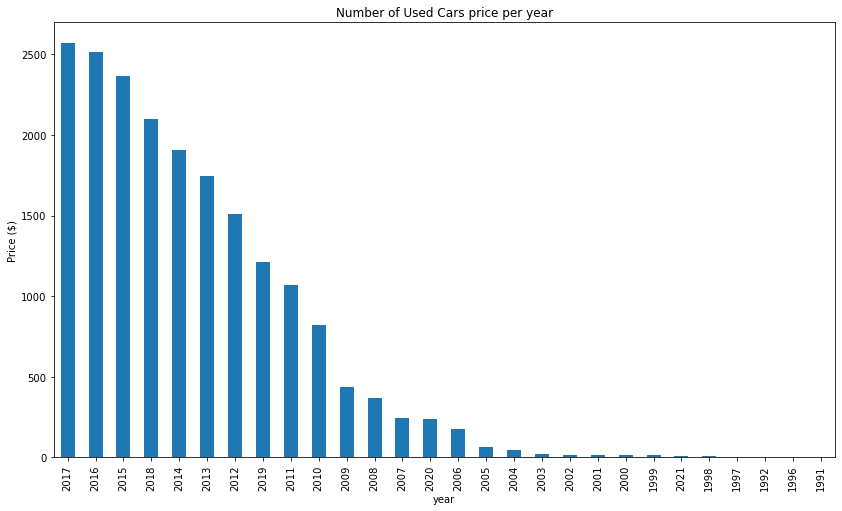

In [123]:
#distribution bar chart --> year/price
plt = df1['year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars price per year")
plt.set_xlabel("year")
plt.set_ylabel("Price ($)")

In [124]:
df1.dtypes

Old price            float64
year                   Int64
fuel                  object
gear                  object
Odometer (kms)       float64
Country               object
Manufacturer_name     object
Price ($)              int64
dtype: object

Text(0, 0.5, 'Price ($)')

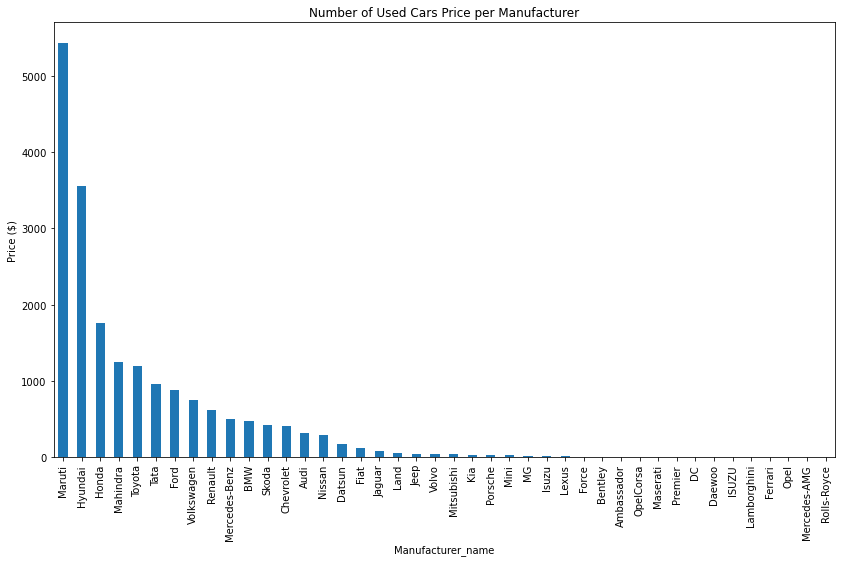

In [125]:
#distribution bar chart --> Manufacturers/sales adverts
ax = df1['Manufacturer_name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Price per Manufacturer")
ax.set_xlabel("Manufacturer_name")
ax.set_ylabel("Price ($)")

<AxesSubplot:xlabel='Price ($)'>

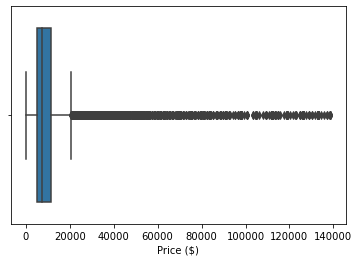

In [126]:
#detect and remove outliers
sns.boxplot(x=df1['Price ($)'])

In [127]:
#drop columns
#keep: fuel, gear, year, Odometer, price, manufacturer_name, Country
df1.drop(['Old price'],axis=1,inplace=True)

In [128]:
#get info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19480 entries, 0 to 20025
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               19479 non-null  Int64  
 1   fuel               19479 non-null  object 
 2   gear               19479 non-null  object 
 3   Odometer (kms)     19479 non-null  float64
 4   Country            19480 non-null  object 
 5   Manufacturer_name  19479 non-null  object 
 6   Price ($)          19480 non-null  int64  
dtypes: Int64(1), float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [129]:
df1['gear'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [130]:
df1['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', nan, 'Electric'], dtype=object)

In [131]:
df1['Manufacturer_name'] = df1['Manufacturer_name'].str.lower()
df1['Manufacturer_name'].unique()

array(['maruti', 'hyundai', 'ford', 'mahindra', 'tata', 'renault',
       'nissan', 'mini', 'mercedes-benz', 'toyota', 'fiat', 'volkswagen',
       'honda', 'chevrolet', 'ambassador', 'datsun', 'kia', 'bmw',
       'mitsubishi', 'audi', 'skoda', nan, 'land', 'jaguar', 'daewoo',
       'bentley', 'mg', 'isuzu', 'porsche', 'volvo', 'lexus', 'jeep',
       'premier', 'maserati', 'force', 'lamborghini', 'ferrari',
       'opelcorsa', 'mercedes-amg', 'dc', 'rolls-royce', 'opel'],
      dtype=object)

In [132]:
#drop nan
df1 = df1.dropna()

In [133]:
#get info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19479 entries, 0 to 20025
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               19479 non-null  Int64  
 1   fuel               19479 non-null  object 
 2   gear               19479 non-null  object 
 3   Odometer (kms)     19479 non-null  float64
 4   Country            19479 non-null  object 
 5   Manufacturer_name  19479 non-null  object 
 6   Price ($)          19479 non-null  int64  
dtypes: Int64(1), float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [134]:
df1.head()

,year,fuel,gear,Odometer (kms),Country,Manufacturer_name,Price ($)
0,2012,Petrol,Manual,120000.0,India,maruti,1680
1,2016,Petrol,Manual,20000.0,India,hyundai,7700
2,2010,Petrol,Manual,60000.0,India,hyundai,3010
3,2012,Petrol,Manual,37000.0,India,maruti,3164
4,2015,Diesel,Manual,30000.0,India,ford,7980


In [135]:
#Re arrange the columns

new_columns = ['Manufacturer_name', 'gear', 'Odometer (kms)', 'year', 'fuel', 'Price ($)', 'Country']
df1 = df1[new_columns]
df1.head()

,Manufacturer_name,gear,Odometer (kms),year,fuel,Price ($),Country
0,maruti,Manual,120000.0,2012,Petrol,1680,India
1,hyundai,Manual,20000.0,2016,Petrol,7700,India
2,hyundai,Manual,60000.0,2010,Petrol,3010,India
3,maruti,Manual,37000.0,2012,Petrol,3164,India
4,ford,Manual,30000.0,2015,Diesel,7980,India


In [141]:
df1.describe()

,Odometer (kms),year,Price ($)
count,1.947900e+04,19479.000000,19479.000000
mean,5.829839e+04,2014.516710,11615.068843
std,5.211843e+04,3.255949,15783.893784
min,1.000000e+02,1991.000000,1400.000000
25%,3.115050e+04,2013.000000,4900.000000
50%,5.200000e+04,2015.000000,7350.000000
75%,7.400000e+04,2017.000000,11200.000000
max,3.800000e+06,2021.000000,138600.000000


In [55]:
df1.to_csv('Cardheko_Corrected.csv',sep=',')

# df2: autoscout24-germany-dataset-edited.csv
describe
clean

In [86]:
df2.head(5)

,odometer,Manufacturer_name,fuel,gear,old price,year,Country,Price ($)
0,235000,BMW,Diesel,Manual,6800,2011,Germany,8024.00
1,92800,Volkswagen,Gasoline,Manual,6877,2011,Germany,8114.86
2,149300,SEAT,Gasoline,Manual,6900,2011,Germany,8142.00
3,96200,Renault,Gasoline,Manual,6950,2011,Germany,8201.00
4,156000,Peugeot,Gasoline,Manual,6950,2011,Germany,8201.00


In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   odometer           46405 non-null  int64  
 1   Manufacturer_name  46405 non-null  object 
 2   fuel               46405 non-null  object 
 3   gear               46223 non-null  object 
 4   old price          46405 non-null  int64  
 5   year               46405 non-null  int64  
 6   Country            46405 non-null  object 
 7   Price ($)          46405 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.8+ MB


In [88]:
#get descriptive stats
df2.describe()

,odometer,old price,year,Price ($)
count,4.640500e+04,4.640500e+04,46405.000000,4.640500e+04
mean,7.117786e+04,1.657234e+04,2016.012951,1.955536e+04
std,6.262531e+04,1.930470e+04,3.155214,2.277954e+04
min,0.000000e+00,1.100000e+03,2011.000000,1.298000e+03
25%,1.980000e+04,7.490000e+03,2013.000000,8.838200e+03
50%,6.000000e+04,1.099900e+04,2016.000000,1.297882e+04
75%,1.050000e+05,1.949000e+04,2019.000000,2.299820e+04
max,1.111111e+06,1.199900e+06,2021.000000,1.415882e+06


In [89]:
#get sum nan
df2.isna().sum()

odometer               0
Manufacturer_name      0
fuel                   0
gear                 182
old price              0
year                   0
Country                0
Price ($)              0
dtype: int64

In [90]:
#get sum non nan
df2.notnull().sum()


odometer             46405
Manufacturer_name    46405
fuel                 46405
gear                 46223
old price            46405
year                 46405
Country              46405
Price ($)            46405
dtype: int64

In [92]:
df2.dtypes

odometer               int64
Manufacturer_name     object
fuel                  object
gear                  object
old price              int64
year                   int64
Country               object
Price ($)            float64
dtype: object

In [93]:
#int to float: Odometer
df2['odometer'] = df2['odometer'].astype('float') 
assert df2['odometer'].dtype == 'float'

In [96]:
#float to int: price
df2['Price ($)'] = df2['Price ($)'].astype(np.int64)

In [97]:
df2.dtypes

odometer             float64
Manufacturer_name     object
fuel                  object
gear                  object
old price              int64
year                   int64
Country               object
Price ($)              int64
dtype: object

In [98]:
#remove duplicate rows
df2.duplicated().sum()
df2.drop_duplicates(inplace=True)
df2.shape

(44119, 8)

In [99]:
print(df2['Price ($)'].max())
print(df2['Price ($)'].min())
print(df2['Price ($)'].mean())
print(df2['Price ($)'].median())

1415882
1298
19530.557786894537
12968.0


Text(0, 0.5, 'Price ($)')

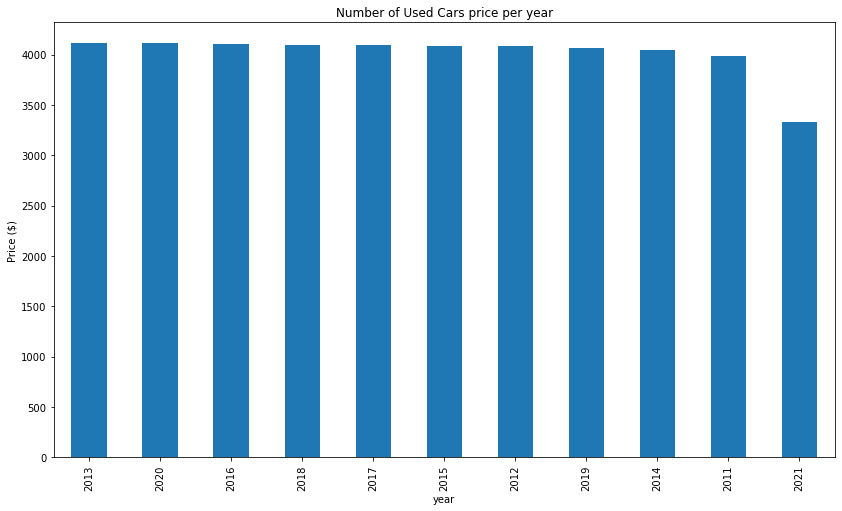

In [65]:

#distribution bar chart --> year/price
plt = df2['year'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars price per year")
plt.set_xlabel("year")
plt.set_ylabel("Price ($)")

Text(0, 0.5, 'Price ($)')

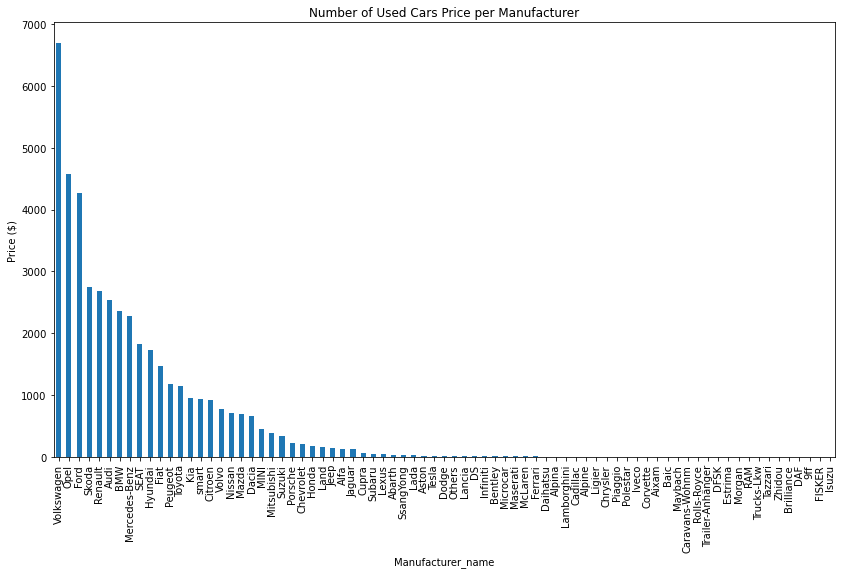

In [66]:
#distribution bar chart --> Manufacturers/sales adverts
ax = df2['Manufacturer_name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Price per Manufacturer")
ax.set_xlabel("Manufacturer_name")
ax.set_ylabel("Price ($)")


<AxesSubplot:xlabel='Price ($)'>

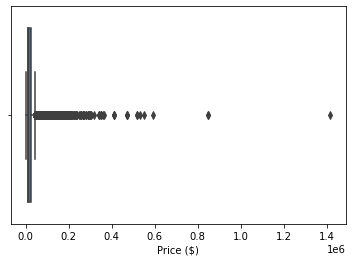

In [100]:
#detect and remove outliers
sns.boxplot(x=df2['Price ($)'])

In [101]:
#drop columns
#keep: fuel, gear, year, Odometer, price, manufacturer_name, Country
df2.drop(['old price'],axis=1,inplace=True)


In [102]:
df2['gear'].unique()

array(['Manual', 'Automatic', nan, 'Semi-automatic'], dtype=object)

In [103]:
df2['fuel'].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [104]:
df2['Manufacturer_name'] = df2['Manufacturer_name'].str.lower()
df2['Manufacturer_name'].unique()


array(['bmw', 'volkswagen', 'seat', 'renault', 'peugeot', 'toyota',
       'opel', 'mazda', 'ford', 'mercedes-benz', 'chevrolet', 'audi',
       'fiat', 'kia', 'dacia', 'mini', 'hyundai', 'skoda', 'citroen',
       'infiniti', 'suzuki', 'ssangyong', 'smart', 'cupra', 'volvo',
       'jaguar', 'porsche', 'nissan', 'honda', 'lada', 'mitsubishi',
       'others', 'lexus', 'jeep', 'maserati', 'bentley', 'land', 'alfa',
       'subaru', 'dodge', 'microcar', 'lamborghini', 'baic', 'tesla',
       'chrysler', '9ff', 'mclaren', 'aston', 'rolls-royce', 'alpine',
       'lancia', 'abarth', 'ds', 'daihatsu', 'ligier', 'ferrari',
       'caravans-wohnm', 'aixam', 'piaggio', 'zhidou', 'morgan',
       'maybach', 'tazzari', 'trucks-lkw', 'ram', 'iveco', 'daf',
       'alpina', 'polestar', 'brilliance', 'fisker', 'cadillac',
       'trailer-anhänger', 'isuzu', 'corvette', 'dfsk', 'estrima'],
      dtype=object)

In [106]:
#drop nan
df2 = df2.dropna()

In [107]:
#get info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43944 entries, 0 to 46399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   odometer           43944 non-null  float64
 1   Manufacturer_name  43944 non-null  object 
 2   fuel               43944 non-null  object 
 3   gear               43944 non-null  object 
 4   year               43944 non-null  int64  
 5   Country            43944 non-null  object 
 6   Price ($)          43944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.7+ MB


In [108]:
df2.head()

,odometer,Manufacturer_name,fuel,gear,year,Country,Price ($)
0,235000.0,bmw,Diesel,Manual,2011,Germany,8024
1,92800.0,volkswagen,Gasoline,Manual,2011,Germany,8114
2,149300.0,seat,Gasoline,Manual,2011,Germany,8142
3,96200.0,renault,Gasoline,Manual,2011,Germany,8201
4,156000.0,peugeot,Gasoline,Manual,2011,Germany,8201


In [110]:
#Re arrange the columns
new_columns = ['Manufacturer_name', 'gear', 'odometer', 'year', 'fuel', 'Price ($)', 'Country']
df2 = df2[new_columns]



In [111]:
df2.head()

,Manufacturer_name,gear,odometer,year,fuel,Price ($),Country
0,bmw,Manual,235000.0,2011,Diesel,8024,Germany
1,volkswagen,Manual,92800.0,2011,Gasoline,8114,Germany
2,seat,Manual,149300.0,2011,Gasoline,8142,Germany
3,renault,Manual,96200.0,2011,Gasoline,8201,Germany
4,peugeot,Manual,156000.0,2011,Gasoline,8201,Germany


In [112]:
df2.to_csv('Autoscout_cleaned.csv',sep=',')

In [136]:
df1.head()

,Manufacturer_name,gear,Odometer (kms),year,fuel,Price ($),Country
0,maruti,Manual,120000.0,2012,Petrol,1680,India
1,hyundai,Manual,20000.0,2016,Petrol,7700,India
2,hyundai,Manual,60000.0,2010,Petrol,3010,India
3,maruti,Manual,37000.0,2012,Petrol,3164,India
4,ford,Manual,30000.0,2015,Diesel,7980,India


In [137]:
df2.head()

,Manufacturer_name,gear,odometer,year,fuel,Price ($),Country
0,bmw,Manual,235000.0,2011,Diesel,8024,Germany
1,volkswagen,Manual,92800.0,2011,Gasoline,8114,Germany
2,seat,Manual,149300.0,2011,Gasoline,8142,Germany
3,renault,Manual,96200.0,2011,Gasoline,8201,Germany
4,peugeot,Manual,156000.0,2011,Gasoline,8201,Germany


In [142]:
df3 = pd.read_csv("Cardheko_Corrected.csv")
df4 = pd.read_csv("Autoscout_cleaned.csv")

In [143]:
df5=pd.concat([df3,df4], ignore_index=True)
df5.head(10)

,Unnamed: 0,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,0,maruti,Manual,120000,2012,Petrol,1680,India
1,1,hyundai,Manual,20000,2016,Petrol,7700,India
2,2,hyundai,Manual,60000,2010,Petrol,3010,India
3,3,maruti,Manual,37000,2012,Petrol,3164,India
4,4,ford,Manual,30000,2015,Diesel,7980,India
5,5,maruti,Manual,35000,2013,Petrol,4900,India
6,6,hyundai,Manual,40000,2013,Petrol,4410,India
7,7,maruti,Manual,17512,2018,Petrol,5740,India
8,8,hyundai,Automatic,20000,2019,Petrol,14700,India
9,9,mahindra,Manual,70000,2017,Diesel,8050,India


In [144]:
df5.to_csv('Cardheko_Autoscout_cleaned.csv',sep=',')

In [148]:
df6 = pd.read_csv("vehicles+cars_clean_merged.csv")
df7 = pd.read_csv("Cardheko_Autoscout_cleaned.csv")


In [149]:
df6.head(5)

,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


In [150]:
df7.head(5)

,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,maruti,Manual,120000,2012,Petrol,1680,India
1,hyundai,Manual,20000,2016,Petrol,7700,India
2,hyundai,Manual,60000,2010,Petrol,3010,India
3,maruti,Manual,37000,2012,Petrol,3164,India
4,ford,Manual,30000,2015,Diesel,7980,India


In [151]:
df8=pd.concat([df6,df7], ignore_index=True)
df8.head(5)

,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


In [152]:
df8.to_csv('Group6_Cars.csv',sep=',')

In [173]:
df = pd.read_csv("Group6_Cars.csv")

In [174]:
df['Manufacturer_name'] = df['Manufacturer_name'].str.lower()
df['Manufacturer_name'].unique()


array(['subaru', 'lada', 'dodge', 'уаз', 'kia', 'opel', 'alfa romeo',
       'acura', 'dacia', 'lexus', 'mitsubishi', 'lancia', 'citroen',
       'mini', 'ssangyong', 'daewoo', 'geely', 'ваз', 'fiat', 'ford',
       'renault', 'seat', 'rover', 'volkswagen', 'lifan', 'jeep', 'audi',
       'заз', 'toyota', 'газ', 'volvo', 'chevrolet', 'great wall',
       'buick', 'pontiac', 'hyundai', 'nissan', 'suzuki', 'bmw', 'mazda',
       'land rover', 'iveco', 'skoda', 'saab', 'chery', 'honda',
       'mercedes-benz', 'peugeot', 'chrysler', 'gmc', 'ram', 'cadillac',
       'jaguar', 'infiniti', 'lincoln', 'alfa-romeo', 'porsche', 'tesla',
       'saturn', 'mercury', 'harley-davidson', 'aston-martin', 'morgan',
       'ferrari', 'maruti', 'mahindra', 'tata', 'ambassador', 'datsun',
       'land', 'bentley', 'mg', 'isuzu', 'premier', 'maserati', 'force',
       'lamborghini', 'opelcorsa', 'mercedes-amg', 'dc', 'rolls-royce',
       'smart', 'cupra', 'others', 'alfa', 'microcar', 'baic', '9ff',
    

In [175]:
df['Fuel'] = df['Fuel'].str.lower()
df['Fuel'].unique()

array(['gasoline', 'diesel', 'hybrid-petrol', 'electric', 'gas', 'other',
       'hybrid', 'petrol', 'cng', 'lpg', 'electric/gasoline', 'otherss',
       'electric/diesel', 'others', 'hydrogen', 'ethanol'], dtype=object)

In [176]:
df['Gear'] = df['Gear'].str.lower()
df['Gear'].unique()

array(['manual', 'automatic', 'other', 'semi-automatic'], dtype=object)

In [177]:
df.describe()

,Index,Odometer (km),year,Price ($)
count,407552.000000,4.075520e+05,407552.000000,4.075520e+05
mean,203775.500000,1.401383e+05,2012.661862,1.798468e+04
std,117650.272791,9.951946e+04,5.528372,1.430996e+04
min,0.000000,0.000000e+00,1982.000000,1.000000e+03
25%,101887.750000,5.475000e+04,2010.000000,7.499000e+03
50%,203775.500000,1.271057e+05,2014.000000,1.445000e+04
75%,305663.250000,2.092142e+05,2017.000000,2.599500e+04
max,407551.000000,3.800000e+06,2022.000000,1.415882e+06


Text(0.5, 0, 'Fuel')

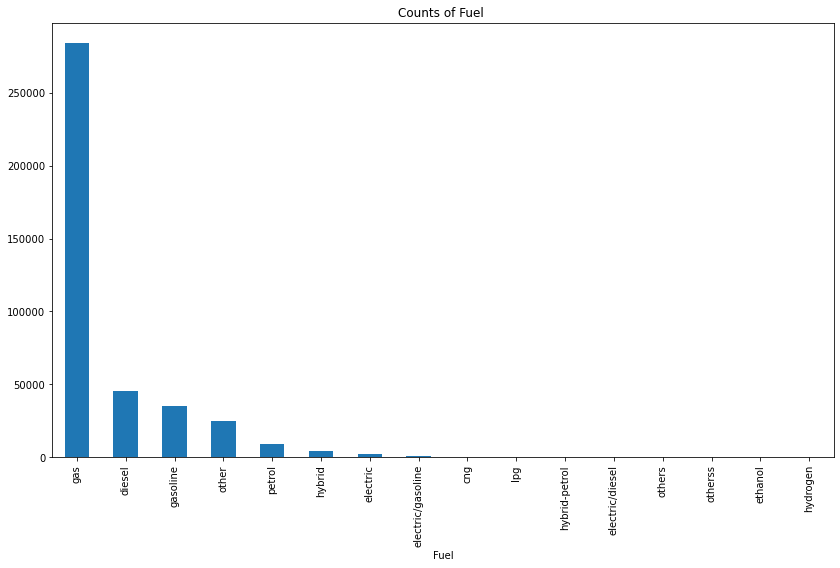

In [178]:
#distribution bar chart --> Manufacturers/sales adverts
ax = df['Fuel'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Counts of Fuel ")
ax.set_xlabel("Fuel")



In [181]:
df['Fuel'] = df['Fuel'].str.replace('electric/gasoline','hybrid')
df['Fuel'] = df['Fuel'].str.replace('cng','gas')
df['Fuel'] = df['Fuel'].str.replace('hybrid-petrol','hybrid')
df['Fuel'] = df['Fuel'].str.replace('electric/diesel','hybrid')
df['Fuel'] = df['Fuel'].str.replace('others','other')
df['Fuel'] = df['Fuel'].str.replace('otherss','other')
df['Fuel'] = df['Fuel'].str.replace('lpg','gas')

In [170]:
df['Fuel'] = df['Fuel'].str.strip()

In [155]:
#Drop zero 
df = df[df['Odometer (km)'] >=1]

Text(0.5, 0, 'Fuel')

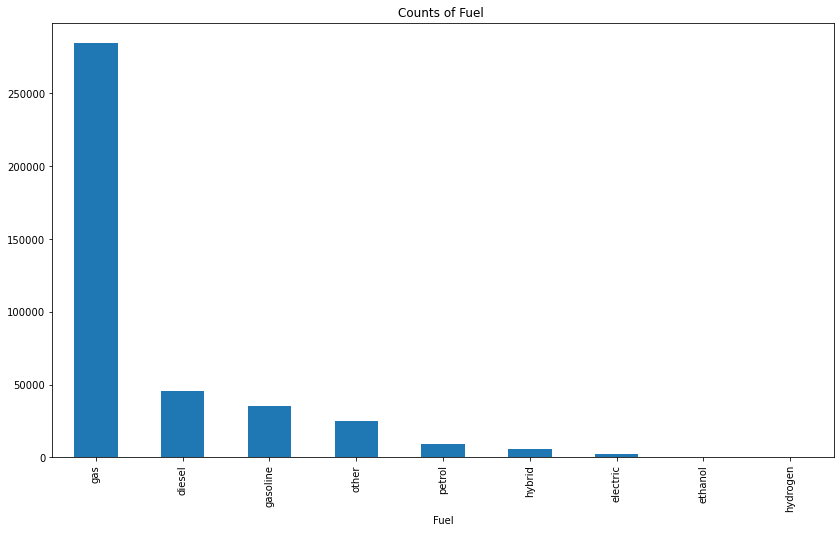

In [182]:
#distribution bar chart --> Manufacturers/sales adverts
ax = df['Fuel'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Counts of Fuel ")
ax.set_xlabel("Fuel")


In [183]:
df.describe()

,Index,Odometer (km),year,Price ($)
count,407552.000000,4.075520e+05,407552.000000,4.075520e+05
mean,203775.500000,1.401383e+05,2012.661862,1.798468e+04
std,117650.272791,9.951946e+04,5.528372,1.430996e+04
min,0.000000,0.000000e+00,1982.000000,1.000000e+03
25%,101887.750000,5.475000e+04,2010.000000,7.499000e+03
50%,203775.500000,1.271057e+05,2014.000000,1.445000e+04
75%,305663.250000,2.092142e+05,2017.000000,2.599500e+04
max,407551.000000,3.800000e+06,2022.000000,1.415882e+06


In [184]:
df['Gear'].unique()

array(['manual', 'automatic', 'other', 'semi-automatic'], dtype=object)

In [185]:
df['Fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'electric', 'gas', 'other',
       'petrol', 'hydrogen', 'ethanol'], dtype=object)

In [186]:
df.to_csv('Group6_Cars_Edited.csv',sep=',')